dx_min = 1e-08 (optimal dx) and error_min = 1.41525e-08
If error~dx^n then n = 0.981146 for forward difference method which is close to the expected value of 1


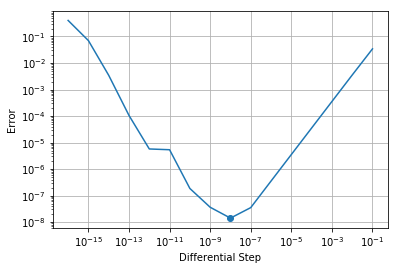

In [5]:
#Here is the solution to last thursday's assignment

import pylab as p
from numpy import *

def derifw(f,x,dx):
    return (f(x + dx) - f(x))/dx

def dericd(f,x,dx):
    return (f(x + dx/2) - f(x - dx/2))/dx

#Here i use the forward difference method to evaluate the absolute error of taking a numerical derivative for cosine at 
#x = pi/4. The following program identifies the minimum value of error and the differential step that generates it. 
#Then, the program plots the absolute error vs the differential step in a log-log plot.

f = cos
x = pi/4
dx = []
error = []
for i in 10**arange(-16, 0, 1.):
    dx.append(i)
    difference = abs(derifw(f,x,i) - (-sin(x)))
    error.append(difference)
    if difference == min(error):
        min_dx = i
        y = min(error)
n = log(y)/log(min_dx)
print('dx_min = %g (optimal dx) and error_min = %g' %(min_dx, y))
print('If error~dx^n then n = %g for forward difference method which is close to the expected value of 1' % n)
    
p.plot(dx,error)
p.scatter(min_dx,y)
p.xlabel('Differential Step')
p.ylabel('Error')
p.xscale('log')
p.yscale('log')
p.grid(True)
p.show()


dx_min = 1e-05 (optimal dx) and error_min = 2.86149e-12
If error~dx^n then n = 2.30868 for central difference method which is close to the expected value of 2


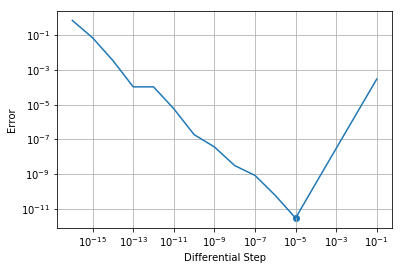

In [2]:
#Here i use the central difference method to evaluate the absolute error of taking a numerical derivative for cosine at 
#x = pi/4. The following program identifies the minimum value of error and the differential step that generates it. 
#Then, the program plots the absolute error vs the differential step in a log-log plot.

f = cos
x = pi/4
dx = []
error = []
for i in 10**arange(-16, 0, 1.):
    dx.append(i)
    difference = abs(dericd(f,x,i) - (-sin(x)))
    error.append(difference)
    if difference == min(error):
        min_dx = i
        y = min(error)
n = log(y)/log(min_dx)
print('dx_min = %g (optimal dx) and error_min = %g' %(min_dx, y))
print('If error~dx^n then n = %g for central difference method which is close to the expected value of 2' % n)
    
p.plot(dx,error)
p.scatter(min_dx,y)
p.xlabel('Differential Step')
p.ylabel('Error')
p.xscale('log')
p.yscale('log')
p.grid(True)
p.show()

#This scheme is better because it allows effectively eliminates the first order contributions to the derivative which are 
#several orders of magnitude larger than the second order.

C:\Users\Rodrigo\Anaconda3\lib\site-packages\ipykernel\__main__.py:17: RuntimeWarning: divide by zero encountered in log


dx_min = 0.1 (optimal dx) and error_min = 0
If error~dx^n then n = inf 


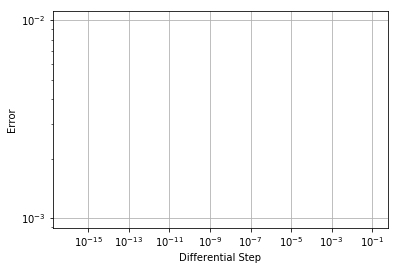

In [3]:
#Here we've changed x to 0 while using the central difference method. The results are useless because the relative uncertainty 
#in using zero is 100%. Another thing to note is that if we try 2pi (which should yield the same results) we do get a numerical 
#result instead of nothing. This is because non zero digits are not uncertain to 100% anymore, they are uncertain to the 
#sixteenth decimal place as set by the machine error. Also, in the case of 2 pi, there is a lot of symmetry in the function 
#being used, so the results should be misleadingly good.
f = cos
x = 0
dx = []
error = []
for i in 10**arange(-16, 0, 1.):
    dx.append(i)
    difference = abs(dericd(f,x,i) - (-sin(x)))
    error.append(difference)
    if difference == min(error):
        min_dx = i
        y = min(error)
n = log(y)/log(min_dx)
print('dx_min = %g (optimal dx) and error_min = %g' %(min_dx, y))
print('If error~dx^n then n = %g ' % n)
    
p.plot(dx,error)
p.scatter(min_dx,y)
p.xlabel('Differential Step')
p.ylabel('Error')
p.xscale('log')
p.yscale('log')
p.grid(True)
p.show()

In [48]:
#Here is the solution to this past wednesdays homework. I will solve for the quadratic formula and identify the better
#solution from 2 different numerical methods.

import pylab as p
from numpy import *

def qf(a,b,c):
    x1 = (-b + (b**2 - 4*a*c)**(1/2))/(2*a)
    x2 = (-b - (b**2 - 4*a*c)**(1/2))/(2*a)
    x3 = -2*c/(b + (b**2 - 4*a*c)**(1/2))
    x4 = -2*c/(b - (b**2 - 4*a*c)**(1/2))
    return [x1,x2,x3,x4]
    
for c in 10**arange(-16,0.,1.):
    a = 1
    b = 1
    qf(a,b,c)
    print('for c = %g ' %c)
    print(qf(a,b,c))
print("\n It is obvious from these presented sets, that the negative solution from the standard quadratic formula,") 
print("and the positive solution of the conjugate formula yield better answers when considering the machine")
print("precision limit. We are able to observe this because the results are supposed to be close to -1 and 0")
print("respectively, and to the machine precision limit, the mentioned solutions are the closest. The reason")
print("is that the subtractive cancellation error generates a big error and then is added to -b in the equation")
print("for x1. Similarly, the problem is repeated in the solution for x4 because althought it is subtracted")
print("The answer is actually 1/error, making it significantly larger again. Thus, the easiest way to extend my")
print("function to yield the most precise answers is to simply return only x2 and x3 and ignore refuse to print the")
print("other answers as follows:")

def qf_better(a,b,c):
    #x1 = (-b + (b**2 - 4*a*c)**(1/2))/(2*a)
    x2 = (-b - (b**2 - 4*a*c)**(1/2))/(2*a)
    x3 = -2*c/(b + (b**2 - 4*a*c)**(1/2))
    #x4 = -2*c/(b - (b**2 - 4*a*c)**(1/2))
    return [x2,x3]

#i commented out the calculation for x1 and x4 in order to save a marginal amount of computing power.

qf_better(1,1,10**-16)

for c = 1e-16 
[-1.1102230246251565e-16, -0.9999999999999999, -1.0000000000000001e-16, -0.9007199254740992]
for c = 1e-15 
[-9.992007221626409e-16, -0.999999999999999, -1.000000000000001e-15, -1.0007999171934436]
for c = 1e-14 
[-9.992007221626409e-15, -0.99999999999999, -1.00000000000001e-14, -1.0007999171934436]
for c = 1e-13 
[-9.997558336749535e-14, -0.9999999999999001, -1.0000000000001e-13, -1.000244225956801]
for c = 1e-12 
[-1.0000333894311098e-12, -0.9999999999989999, -1.000000000001e-12, -0.9999666116837072]
for c = 1e-11 
[-1.000000082740371e-11, -0.99999999999, -1.00000000001e-11, -0.9999999172596358]
for c = 1e-10 
[-1.000000082740371e-10, -0.9999999999, -1.0000000001000001e-10, -0.9999999172596359]
for c = 1e-09 
[-1.0000000272292198e-09, -0.9999999989999999, -1.0000000010000002e-09, -0.999999972770781]
for c = 1e-08 
[-1.0000000105758744e-08, -0.9999999899999998, -1.0000000100000004e-08, -0.9999999894241257]
for c = 1e-07 
[-1.0000000999488279e-07, -0.99999989999999, -1.0

[-0.9999999999999999, -1.0000000000000001e-16]